In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [31]:
t1 = pd.read_csv('train.csv')
t2 = pd.read_csv('test.csv')
df = pd.concat([t1,t2])
df['rating'] = df['click_bool'] + (4 * df['booking_bool'])

In [32]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [33]:
clicked = df[df['click_bool']==1]

print(df['click_bool'].value_counts())
print(clicked['booking_bool'].value_counts())

0    237319
1    221879
Name: click_bool, dtype: int64
1    138390
0     83489
Name: booking_bool, dtype: int64


Text(0.5, 1.0, 'Clicked on grouped by review score')

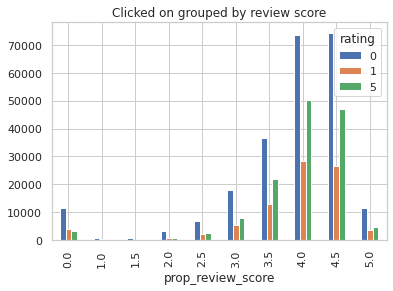

In [34]:
pd.crosstab(df.prop_review_score,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by review score')

Text(0.5, 1.0, 'Clicked on grouped by star rating')

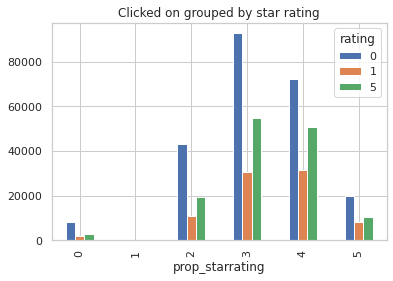

In [35]:
pd.crosstab(df.prop_starrating,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by star rating')

Text(0.5, 1.0, 'Booked after clicking grouped by rating')

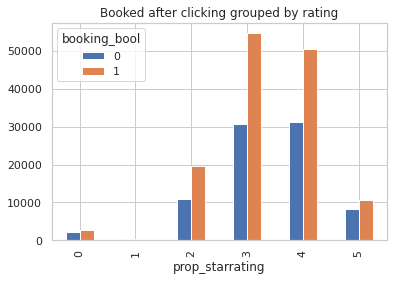

In [36]:
pd.crosstab(clicked.prop_starrating,clicked.booking_bool).plot(kind='bar')
plt.title('Booked after clicking grouped by rating')

In [38]:
features = ['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag']

In [87]:
df = df.fillna(-1)

In [114]:
X = df[features]
y = df['rating']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

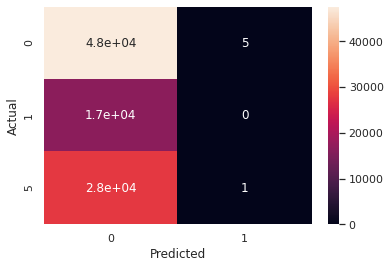

In [117]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [118]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.5173998257839721


In [119]:
X_test.loc[:, 'rating'] = y_pred

/home/es/.local/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/es/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [120]:
X_test

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,price_usd,promotion_flag,rating
177784,2,3.5,1,2.08,0.0329,70.15,0,0
261799,3,4.0,1,3.00,0.0072,169.00,0,0
85621,4,4.5,1,5.60,0.0455,219.68,0,0
58140,4,4.0,1,0.69,0.1566,140.00,0,0
33394,2,4.0,1,1.39,0.2327,69.00,0,0
...,...,...,...,...,...,...,...,...
256596,2,3.5,1,1.95,-1.0000,51.00,0,0
58343,4,4.0,1,5.00,0.1609,189.00,0,0
86726,3,3.5,1,1.61,0.0159,109.00,1,0
348294,3,4.0,1,1.79,0.0274,84.00,0,0


In [121]:
X_test.columns

Index(['prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2', 'price_usd',
       'promotion_flag', 'rating'],
      dtype='object')

In [111]:
X_test['rating'] = X_test.groupby(X_test.index)['rating'].rank(ascending=False)
X_test

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,price_usd,promotion_flag,rating
rating,,,,,,,,
1.0,2,3.5,1,2.08,0.0329,70.15,0,0
1.0,3,4.0,1,3.00,0.0072,169.00,0,0
1.5,4,4.5,1,5.60,0.0455,219.68,0,0
1.0,4,4.0,1,0.69,0.1566,140.00,0,0
1.5,2,4.0,1,1.39,0.2327,69.00,0,0
...,...,...,...,...,...,...,...,...
1.0,2,3.5,1,1.95,-1.0000,51.00,0,0
1.0,4,4.0,1,5.00,0.1609,189.00,0,0
1.5,3,3.5,1,1.61,0.0159,109.00,1,0


In [ ]:
df['Auction_Rank'] = df.groupby('Auction_ID')['Bid_Price'].rank(ascending=False)